<a href="https://colab.research.google.com/github/Shuvamjoy34/NumberCrunchers/blob/master/CNN_car_vs_bike_vs_random_Image_Classification_Final%20with%20own%20architecture%2C%20Alex%20Net%2C%20VGG16%20and%20Lenet-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Network Based Car vs Bike vs Random Images Multi Class Classification**(Own Architechture,AlexNet,VGG16 and LeNet-5)


**Importing required python packages**

In [ ]:
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.keras import balanced_batch_generator
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 

from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from cv2 import cv2
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from keras.layers import Dense, Dropout, Flatten, Input, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array 
from keras import regularizers
from keras import optimizers
from keras.models import load_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.Session(config=config)

**Connecting google colab notebook to my google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the image files with JPG format**


**Resizing and Labelling the images**




In [ ]:
data=[]
labels=[]
car=os.listdir("/content/drive/My Drive/Images/car/")
for cars in car:
    try:
        image=cv2.imread("/content/drive/My Drive/Images/car/"+ cars)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((128,128))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

bike=os.listdir("/content/drive/My Drive/Images/bike/")
for bikes in bike:
    try:
        image=cv2.imread("/content/drive/My Drive/Images/bike/"+ bikes)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((128,128))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")
random=os.listdir("/content/drive/My Drive/Images/random/")
for randoms in random:
    try:
        image=cv2.imread("/content/drive/My Drive/Images/random/"+ randoms)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((128,128))
        data.append(np.array(size_image))
        labels.append(2)
    except AttributeError:
        print("")

In [ ]:
images=np.array(data)
labels=np.array(labels)

In [ ]:
s=np.arange(images.shape[0])
np.random.shuffle(s)
images=images[s]
labels=labels[s]
num_classes=len(np.unique(labels))
len_data=len(images)

**Diving the image dataset into training, validation and testing dataset**

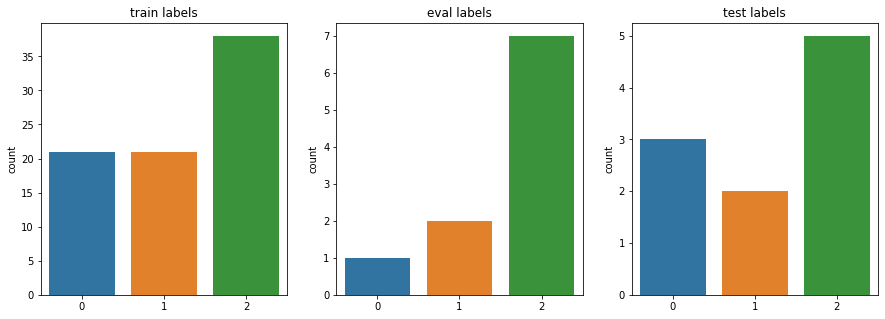

In [ ]:
images =images.astype(np.float32)
images = images/255

train_x , x , train_y , y = train_test_split(images , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([train_y , eval_y , test_y] , ['train labels','eval labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [ ]:
x=x.reshape(x.shape[0], -1)
y=y.reshape(y.shape[0], -1)

train_x=train_x.reshape(train_x.shape[0], -1)
train_y=train_y.reshape(train_y.shape[0], -1)
eval_x=eval_x.reshape(eval_x.shape[0], -1)
eval_y=eval_y.reshape(eval_y.shape[0], -1)


In [ ]:

#from imblearn.over_sampling import SMOTE
#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.
smote = SMOTE('minority',kind='regular',k_neighbors=2)

#train_x_sm, train_y_sm = smote.fit_sample(train_x,train_y)
#print(train_x_sm.shape, train_y_sm.shape)

(102, 49152) (102,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Encoding the labels of the target class of training,validation and testing dataset from(0,1,2) to (0,1) where 1 pops up when there is a class in the array else 0 pops up**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.transform(test_y)
eval_y = lb.transform(eval_y)


In [ ]:
from tensorflow.python.keras import regularizers
from keras.layers.normalization import BatchNormalization
#kernel_regularizer=regularizers.l2(0.05)


**Creating a basic Convolutional Neural Network architecture and using Random Search and Grid Search to find the best Hyper Parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_classifier(activation,dropout_rate_opts,optimizer='adam'):

#BasicConvNet
    classifier = Sequential()

    classifier.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation=activation, input_shape=(128,128,3)))
    keras.layers.BatchNormalization()
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Conv2D(filters=48,kernel_size=(3,3),padding='valid',activation=activation, kernel_regularizer=regularizers.l2(0.05)))
    keras.layers.BatchNormalization()
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Conv2D(filters=256,kernel_size=(3,3),padding='valid',activation=activation, kernel_regularizer=regularizers.l2(0.05)))
    keras.layers.BatchNormalization()
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Dropout(dropout_rate_opts))


    classifier.add(Flatten())# Flattening the 

    #classifier.add(Dense(200,activation="relu")) #200 is the number of nuerons in hidden layers
    classifier.add(Dense(256,activation=activation))
    classifier.add(Dense(84,activation=activation))
    #classifier.add(Dense(32,activation=activation))  

    classifier.add(Dropout(dropout_rate_opts))



    classifier.add(Dense(3,activation="softmax"))  #3 represent output layer neurons for three different classes 

    classifier.summary()
    classifier.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

    return classifier

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
_activations=['tanh','relu','selu']
_optimizers=['sgd', 'adam']
dropout_rate_opts  = [0,  0.2,  0.5]
_batch_size=[16,32,64]

params=dict(activation=_activations,
            optimizer=_optimizers,
            batch_size=_batch_size,
            dropout_rate_opts=dropout_rate_opts
            )
print(params)

{'activation': ['tanh', 'relu', 'selu'], 'optimizer': ['sgd', 'adam'], 'batch_size': [16, 32, 64], 'dropout_rate_opts': [0, 0.2, 0.5]}


In [ ]:
classifier = KerasClassifier(build_fn=create_classifier,epochs=100,batch_size=16)
classifier

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)
rscv = RandomizedSearchCV(classifier, param_distributions=params, cv=3,   n_iter=10)
rscv_results = rscv.fit(train_x_sm,train_y_sm)
print('Best score is: {} using {}'.format(rscv_results.best_score_,
rscv_results.best_params_))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 62, 62, 48)        13872     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 48)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 256)       110848    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 256)      

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
def create_classifier():

#BasicConvNet
    classifier = Sequential()

    classifier.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation="relu", input_shape=(256,256,3)))
#keras.layers.BatchNormalization()
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation="relu", kernel_regularizer=regularizers.l2(0.05)))
#keras.layers.BatchNormalization()
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation="relu", kernel_regularizer=regularizers.l2(0.05)))
    #keras.layers.BatchNormalization()
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    #classifier.add(Dropout(dropout_rate_opts))


    classifier.add(Flatten())# Flattening the 

    #classifier.add(Dense(200,activation="relu")) #200 is the number of nuerons in hidden layers
    classifier.add(Dense(128,activation="relu"))
    classifier.add(Dense(64,activation="relu"))
    classifier.add(Dense(32,activation="relu"))  

    #classifier.add(Dropout(dropout_rate_opts))



    classifier.add(Dense(3,activation="softmax"))  #3 represent output layer neurons for three different classes 

    classifier.summary()
    classifier.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

    return classifier

In [ ]:
# create model
classifier = KerasClassifier(build_fn=create_classifier, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 30, 40, 50]
epochs = [10, 50, 100, 150, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x,y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

In [ ]:
def create_classifier(optimizer='adam'):

#BasicConvNet
    classifier = Sequential()

    classifier.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
#keras.layers.BatchNormalization()
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=regularizers.l2(0.05)))
#keras.layers.BatchNormalization()
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=regularizers.l2(0.05)))
    #keras.layers.BatchNormalization()
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    #classifier.add(Dropout(0.5))


    classifier.add(Flatten())# Flattening the 

    #classifier.add(Dense(200,activation="relu")) #200 is the number of nuerons in hidden layers
    classifier.add(Dense(128,activation="relu"))
    classifier.add(Dense(64,activation="relu"))
    classifier.add(Dense(32,activation="relu"))  

    #classifier.add(Dropout(0.5))



    classifier.add(Dense(3,activation="softmax"))  #3 represent output layer neurons for three different classes 

    classifier.summary()
    classifier.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return classifier

In [ ]:
classifier = KerasClassifier(build_fn=create_classifier, epochs=50, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x,y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 57600)           

In [ ]:
from keras.optimizers import Adamax
def create_classifier(learn_rate=0.01, beta_1=0):

#BasicConvNet
    classifier = Sequential()

    classifier.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
#keras.layers.BatchNormalization()
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=regularizers.l2(0.05)))
#keras.layers.BatchNormalization()
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=regularizers.l2(0.05)))
    #keras.layers.BatchNormalization()
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    #classifier.add(Dropout(0.5))


    classifier.add(Flatten())# Flattening the 

    #classifier.add(Dense(200,activation="relu")) #200 is the number of nuerons in hidden layers
    classifier.add(Dense(128,activation="relu"))
    classifier.add(Dense(64,activation="relu"))
    classifier.add(Dense(32,activation="relu"))  

    #classifier.add(Dropout(0.5))



    classifier.add(Dense(3,activation="softmax"))  #3 represent output layer neurons for three different classes 

    classifier.summary()
    optimizer = Adamax(lr=learn_rate, beta_1=beta_1)
    classifier.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return classifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
classifier = KerasClassifier(build_fn=create_classifier, epochs=50, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
beta_1 = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, beta_1=beta_1)
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(x,y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 57600)           

KeyboardInterrupt: ignored

In [ ]:
! pip install keras

In [ ]:
#,kernel_regularizer=regularizers.l2(0.05)


In [ ]:
from tensorflow.keras.activations import selu
#BasicConvNet
classifier = Sequential()

classifier.add(Conv2D(filters=96,kernel_size=(3,3),padding='valid',activation="relu",input_shape=(128,128,3)))
#keras.layers.BatchNormalization()
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(filters=128,kernel_size=(3,3),padding='valid',activation="relu",kernel_regularizer=regularizers.l2(0.05)))
#keras.layers.BatchNormalization()
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(filters=256,kernel_size=(3,3),padding='valid',activation="relu",kernel_regularizer=regularizers.l2(0.05)))
keras.layers.BatchNormalization()
classifier.add(MaxPooling2D(pool_size=(2,2)))




classifier.add(Dropout(0.5))


classifier.add(Flatten())# Flattening  

#classifier.add(Dense(200,activation="relu"))

classifier.add(Dense(512,activation="relu"))
classifier.add(Dense(256,activation="relu"))
#classifier.add(Dense(128,activation="relu")) #200 is the number of nuerons in hidden layers

classifier.add(Dropout(0.5))



classifier.add(Dense(3,activation="softmax"))  #3 represent output layer neurons for three different classes 
classifier.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 126, 126, 96)      2688      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 63, 63, 96)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 61, 61, 128)       110720    
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 28, 28, 256)       295168    
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 14, 14, 256)     

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.activations import selu
checkpoint = ModelCheckpoint("convnet_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
#from sklearn.utils import class_weight
#class_weight = class_weight.compute_class_weight('balanced' ,np.unique(y_train_labels) ,y_train_labels)
from keras.optimizers import Adam
#from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import SGD
#sgd=SGD(lr=0.01,momentum=0.6,nesterov=False)
#adam = Adam(lr=0.01)

classifier.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
conv= classifier.fit(train_x,train_y,batch_size =32,epochs=100,verbose=1,validation_data=(eval_x, eval_y),callbacks=[checkpoint,early])
conv

Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 14.7059 - accuracy: 0.4250
Epoch 00001: val_accuracy improved from -inf to 0.20000, saving model to convnet_1.h5
3/3 [==============================] - 6s 2s/step - loss: 14.7059 - accuracy: 0.4250 - val_loss: 12.8034 - val_accuracy: 0.2000
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 12.5166 - accuracy: 0.3250
Epoch 00002: val_accuracy improved from 0.20000 to 0.70000, saving model to convnet_1.h5
3/3 [==============================] - 6s 2s/step - loss: 12.5166 - accuracy: 0.3250 - val_loss: 11.0118 - val_accuracy: 0.7000
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 10.6101 - accuracy: 0.4500
Epoch 00003: val_accuracy did not improve from 0.70000
3/3 [==============================] - 5s 2s/step - loss: 10.6101 - accuracy: 0.4500 - val_loss: 9.3162 - val_accuracy: 0.7000
Epoch 4/100
3/3 [==============================] - ETA: 0s - loss: 8.9863 - accuracy: 0.4625
Epoch 00004:

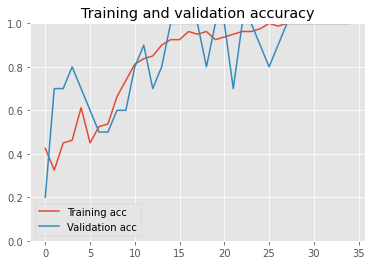

In [ ]:
# plot the training and validation accuracy
acc = conv.history['accuracy']
val_acc = conv.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.ylim(0.0,1)
plt.show()

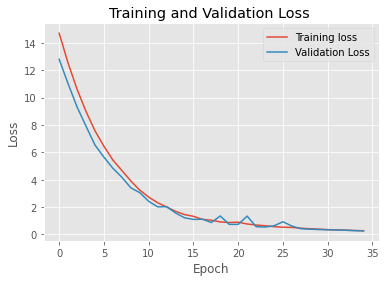

In [ ]:
#Loss and Accuracy in one graph(Training & Validation)

import matplotlib.pyplot as plt
#plt.plot(conv.history["accuracy"])
#plt.plot(conv.history['val_accuracy'])
plt.plot(conv.history['loss'])
plt.plot(conv.history['val_loss'])
plt.title("Training and Validation Loss ")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training loss","Validation Loss"])
plt.show()

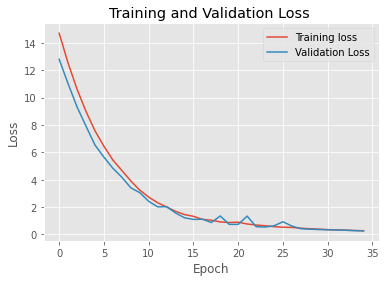

In [ ]:

import matplotlib.pyplot as plt
#plt.plot(conv.history["accuracy"])
#plt.plot(conv.history['val_accuracy'])
plt.plot(conv.history['loss'])
plt.plot(conv.history['val_loss'])
plt.title("Training and Validation Loss ")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training loss","Validation Loss"])
plt.show()

In [ ]:
classifier.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
#STEP_SIZE_TRAIN=balanced_gen.n//balanced_gen.batch_size
#STEP_SIZE_VALID=balanced_gen.n//balanced_gen.batch_size
#STEP_SIZE_TEST=balanced_gen.n//balanced_gen.batch_size
#ep = 100
#batch_size=32
classifier.fit_generator(balanced_gen,steps_per_epoch, 
                        )


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

In [ ]:
#using Image Augmentation Approach(By using Image Data Generator)

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen= ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow(train_x,train_y, batch_size=32)
val_gen = val_datagen.flow(eval_x,eval_y, batch_size=32)
test_gen = val_datagen.flow(test_x,test_y, batch_size =32, shuffle = False)

In [ ]:
STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=val_gen.n//val_gen.batch_size
STEP_SIZE_TEST=test_gen.n//test_gen.batch_size
ep = 100
classifier.fit_generator(generator = train_gen, validation_data= val_gen,
                           steps_per_epoch=STEP_SIZE_TRAIN, epochs=ep, 
                           validation_steps=STEP_SIZE_VALID)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
2/2 [==============================] - 1s 296ms/step - loss: 2.7503 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 160ms/step - loss: 3.7123 - accuracy: 0.2292
Epoch 3/100
2/2 [==============================] - 1s 278ms/step - loss: 1.9649 - accuracy: 0.2708
Epoch 4/100
2/2 [==============================] - 1s 289ms/step - loss: 1.6868 - accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 0s 159ms/step - loss: 1.4224 - accuracy: 0.3542
Epoch 6/100
2/2 [==============================] - 0s 154ms/step - loss: 1.4197 - accuracy: 0.3333
Epoch 7/100
2/2 [==============================] - 0s 160ms/step - loss: 1.2024 - accuracy: 0.5833
Epoch 8/100
2/2 [==============================] - 0s 161ms/step - loss: 1.3252 - accuracy: 0.4792
Epoch 9/100
2/2 [==============================] - 0s 156ms/step - loss: 1.4492 - accuracy: 0.5208
Epoch 10/100
2/2 [===============

In [ ]:
#Once the model is trained we can evaluate it on Test data.

# Evaluating the model for convnet
score = classifier.evaluate(test_x, test_y, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.26072797179222107
Test accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = classifier.predict(test_x)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0(car)', 'class 1(bike)','class 2(random)']
                                               
print(classification_report(np.argmax(test_y,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(test_y,axis=1), y_pred))

                 precision    recall  f1-score   support

   class 0(car)       1.00      1.00      1.00         3
  class 1(bike)       1.00      1.00      1.00         2
class 2(random)       1.00      1.00      1.00         5

       accuracy                           1.00        10
      macro avg       1.00      1.00      1.00        10
   weighted avg       1.00      1.00      1.00        10

[[3 0 0]
 [0 2 0]
 [0 0 5]]


In [ ]:

#AlexNet
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128,128,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same",kernel_regularizer=regularizers.l2(0.05)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
     keras.layers.Dense(1000, activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

In [ ]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Dropout(0.4))
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(1024, input_shape=(128,128,3,)))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(1024))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.5))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.5))

#Output Layer
AlexNet.add(Dense(3))
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_216 (Conv2D)          (None, 57, 57, 96)        34944     
_________________________________________________________________
activation_112 (Activation)  (None, 57, 57, 96)        0         
_________________________________________________________________
max_pooling2d_146 (MaxPoolin (None, 29, 29, 96)        0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 29, 29, 256)       614656    
_________________________________________________________________
activation_113 (Activation)  (None, 29, 29, 256)       0         
_________________________________________________________________
max_pooling2d_147 (MaxPoolin (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 15, 15, 384)     

In [ ]:

model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_226 (Conv2D)          (None, 30, 30, 96)        34944     
_________________________________________________________________
batch_normalization_104 (Bat (None, 30, 30, 96)        384       
_________________________________________________________________
max_pooling2d_152 (MaxPoolin (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_227 (Conv2D)          (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_105 (Bat (None, 14, 14, 256)       1024      
_________________________________________________________________
max_pooling2d_153 (MaxPoolin (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_228 (Conv2D)          (None, 6, 6, 384)       

In [ ]:
#callbacks=[checkpoint,early]

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("alexnet_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
#from keras.optimizers import Adam
#from keras.optimizers import SGD
#opt = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])



lizon=model.fit(train_x,train_y,batch_size = 64,epochs=50,verbose=1,validation_data=(eval_x, eval_y),callbacks=[checkpoint,early])
lizon

Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 9.7590 - accuracy: 0.4000
Epoch 00001: val_accuracy improved from -inf to 0.20000, saving model to alexnet_1.h5
2/2 [==============================] - 1s 542ms/step - loss: 9.7590 - accuracy: 0.4000 - val_loss: 8.1324 - val_accuracy: 0.2000
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 14.7457 - accuracy: 0.3375
Epoch 00002: val_accuracy improved from 0.20000 to 0.70000, saving model to alexnet_1.h5
2/2 [==============================] - 1s 457ms/step - loss: 14.7457 - accuracy: 0.3375 - val_loss: 7.7557 - val_accuracy: 0.7000
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 9.3111 - accuracy: 0.4750
Epoch 00003: val_accuracy did not improve from 0.70000
2/2 [==============================] - 1s 320ms/step - loss: 9.3111 - accuracy: 0.4750 - val_loss: 7.6783 - val_accuracy: 0.7000
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 7.6669 - accuracy: 0.6000
Epoch 00004: 

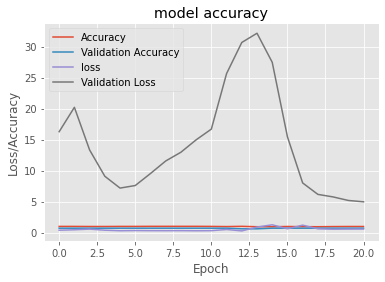

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lizon.history["accuracy"])
plt.plot(lizon.history['val_accuracy'])
plt.plot(lizon.history['loss'])
plt.plot(lizon.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Loss/Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen= ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow(train_x,train_y, batch_size=32)
val_gen = val_datagen.flow(eval_x,eval_y, batch_size=32)
test_gen = val_datagen.flow(test_x,test_y, batch_size =32, shuffle = False)

In [ ]:
STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=val_gen.n//val_gen.batch_size
STEP_SIZE_TEST=test_gen.n//test_gen.batch_size
ep = 100
classifier.fit_generator(generator = train_gen, validation_data= val_gen,
                           steps_per_epoch=STEP_SIZE_TRAIN, epochs=ep, 
                           validation_steps=STEP_SIZE_VALID)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
2/2 [==============================] - 1s 260ms/step - loss: 13.1706 - accuracy: 0.4531
Epoch 2/100
2/2 [==============================] - 0s 240ms/step - loss: 4.7036 - accuracy: 0.2812
Epoch 3/100
2/2 [==============================] - 0s 129ms/step - loss: 2.4718 - accuracy: 0.3125
Epoch 4/100
2/2 [==============================] - 0s 234ms/step - loss: 2.6478 - accuracy: 0.3281
Epoch 5/100
2/2 [==============================] - 0s 132ms/step - loss: 1.4242 - accuracy: 0.5208
Epoch 6/100
2/2 [==============================] - 0s 234ms/step - loss: 2.0586 - accuracy: 0.3750
Epoch 7/100
2/2 [==============================] - 0s 235ms/step - loss: 1.7608 - accuracy: 0.4688
Epoch 8/100
2/2 [==============================] - 0s 131ms/step - loss: 1.4726 - accuracy: 0.4167
Epoch 9/100
2/2 [==============================] - 0s 127ms/step - loss: 1.5628 - accuracy: 0.2708
Epoch 10/100
2/2 [==============

In [ ]:
#Once the model is trained we can evaluate it on Test data.

# Evaluating the model 
alexscore = AlexNet.evaluate(test_x, test_y, verbose=0)
print('Test Loss:', alexscore[0])
print('Test accuracy:', alexscore[1])

Test Loss: 0.3311328887939453
Test accuracy: 0.8999999761581421


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model.predict(test_x)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0(car)', 'class 1(bike)','class 2(random)']
                                               
print(classification_report(np.argmax(test_y,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(test_y,axis=1), y_pred))

                 precision    recall  f1-score   support

   class 0(car)       0.00      0.00      0.00         3
  class 1(bike)       0.00      0.00      0.00         2
class 2(random)       0.50      1.00      0.67         5

       accuracy                           0.50        10
      macro avg       0.17      0.33      0.22        10
   weighted avg       0.25      0.50      0.33        10

[[0 0 3]
 [0 0 2]
 [0 0 5]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
#vgg16
vggmodel = Sequential()
vggmodel.add(Conv2D(input_shape=(128,128,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vggmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vggmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vggmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
keras.layers.Dropout(0.5)
vggmodel.add(Flatten())
vggmodel.add(Dense(units=200,activation="relu"))
keras.layers.Dropout(0.5)
vggmodel.add(Dense(units=200,activation="relu"))
keras.layers.Dropout(0.5)
vggmodel.add(Dense(units=3, activation="softmax"))

In [ ]:
vggmodel.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 64, 64, 256)     

In [ ]:
#from keras.optimizers import Adam
#opt = Adam(lr=0.001)
vggmodel.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
vggmodel.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
VGG=vggmodel.fit(train_x,train_y,batch_size = 32,epochs=100,verbose=1,validation_data=(eval_x, eval_y),callbacks=[checkpoint,early])
VGG

Epoch 1/100


ValueError: ignored

In [ ]:
#Once the model is trained we can evaluate it on Test data.

# Evaluating the model 
vggscore = vggmodel.evaluate(test_x, test_y, verbose=0)
print('Test Loss:', vggscore[0])
print('Test accuracy:', vggscore[1])

Test Loss: 2.089756727218628
Test accuracy: 0.8999999761581421


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = vggmodel.predict(test_x)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0(car)', 'class 1(bike)','class 2(random)']
                                               
print(classification_report(np.argmax(test_y,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(test_y,axis=1), y_pred))

                 precision    recall  f1-score   support

   class 0(car)       0.67      1.00      0.80         2
  class 1(bike)       1.00      1.00      1.00         2
class 2(random)       1.00      0.83      0.91         6

       accuracy                           0.90        10
      macro avg       0.89      0.94      0.90        10
   weighted avg       0.93      0.90      0.91        10

[[2 0 0]
 [0 2 0]
 [1 0 5]]


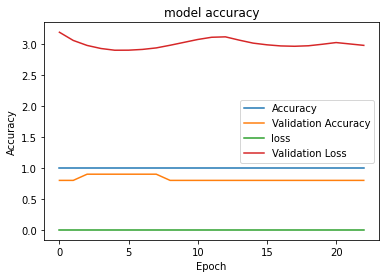

In [ ]:
import matplotlib.pyplot as plt
plt.plot(vgg.history["accuracy"])
plt.plot(vgg.history['val_accuracy'])
plt.plot(vgg.history['loss'])
plt.plot(vgg.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
#lenet
lenet_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='same'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.add(Dropout(0.5))
    keras.layers.Dense(120, activation='relu'), #C5
    keras.layers.Dense(84, activation='relu'), #F6
    keras.add(Dropout(0.5))
    keras.layers.Dense(3, activation='softmax') #Output layer
])

SyntaxError: ignored

In [ ]:
from keras.models import Sequential
from keras import models, layers
import keras
#Instantiate an empty model
lenet = Sequential()

# C1 Convolutional Layer
lenet.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(128,128,3), padding='same'))

# S2 Pooling Layer
lenet.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
lenet.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# S4 Pooling Layer
lenet.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
lenet.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

lenet.add(Dropout(0.5))
#Flatten the CNN output so that we can connect it with fully connected layers
lenet.add(layers.Flatten())

# FC6 Fully Connected Layer
lenet.add(layers.Dense(84, activation='relu'))
lenet.add(Dropout(0.5))

#Output Layer with softmax activation
lenet.add(layers.Dense(3, activation='softmax'))
lenet.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 128, 128, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 127, 127, 6)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 123, 123, 16)      2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 57, 57, 120)       48120     
_________________________________________________________________
dropout_34 (Dropout)         (None, 57, 57, 120)       0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 389880)          

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("lenet_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
#from keras.optimizers import Adam
#opt = Adam(lr=0.001)
lenet.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])



lenetmodel=lenet.fit(train_x,train_y,batch_size = 32,epochs=100,verbose=1,validation_data=(eval_x, eval_y),callbacks=[checkpoint,early])

Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 5.0518 - accuracy: 0.4125
Epoch 00001: val_accuracy improved from -inf to 0.20000, saving model to lenet_1.h5
3/3 [==============================] - 6s 2s/step - loss: 5.0518 - accuracy: 0.4125 - val_loss: 1.8167 - val_accuracy: 0.2000
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 1.1760 - accuracy: 0.3750
Epoch 00002: val_accuracy improved from 0.20000 to 0.70000, saving model to lenet_1.h5
3/3 [==============================] - 5s 2s/step - loss: 1.1760 - accuracy: 0.3750 - val_loss: 0.8011 - val_accuracy: 0.7000
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 1.0275 - accuracy: 0.4750
Epoch 00003: val_accuracy improved from 0.70000 to 0.90000, saving model to lenet_1.h5
3/3 [==============================] - 4s 1s/step - loss: 1.0275 - accuracy: 0.4750 - val_loss: 0.9386 - val_accuracy: 0.9000
Epoch 4/100
3/3 [==============================] - ETA: 0s - loss: 0.9150 - accuracy:

In [ ]:
#Once the model is trained we can evaluate it on Test data.

# Evaluating the model 
lenetscore = lenet.evaluate(test_x, test_y, verbose=0)
print('Test Loss:', lenetscore[0])
print('Test accuracy:', lenetscore[1])

Test Loss: 0.07908450067043304
Test accuracy: 0.8999999761581421


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
lenet_pred = lenet.predict(test_x)
y_pred = np.argmax(lenet_pred, axis=1)
target_names = ['class 0(car)', 'class 1(bike)','class 2(random)']
                                               
print(classification_report(np.argmax(test_y,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(test_y,axis=1), y_pred))

                 precision    recall  f1-score   support

   class 0(car)       0.75      1.00      0.86         3
  class 1(bike)       1.00      0.50      0.67         2
class 2(random)       1.00      1.00      1.00         5

       accuracy                           0.90        10
      macro avg       0.92      0.83      0.84        10
   weighted avg       0.93      0.90      0.89        10

[[3 0 0]
 [1 1 0]
 [0 0 5]]


In [ ]:
!pip install scikit-plot
from scikitplot.metrics import plot_roc_curve

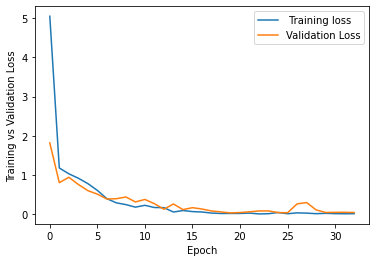

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(lenetmodel.history["accuracy"])
#plt.plot(lenetmodel.history['val_accuracy'])
plt.plot(lenetmodel.history['loss'])
plt.plot(lenetmodel.history['val_loss'])
#plt.title("model accuracy")
plt.ylabel("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.legend([" Training loss","Validation Loss"])
plt.show()